<a href="https://colab.research.google.com/github/tarunpanda001/Growth_Project/blob/main/GrowthOptmizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [ ]:
import random

def generate_csv():
    data = []
    random.seed(42)
    np.random.seed(42)

    for _ in range(300):
        age = random.randint(2, 10)

        gender = random.choice(['Male', 'Female'])

        # Base height approx 75cm + 6cm/year. Variance +/- 10cm.
        height = round(75 + (age * 6) + random.uniform(-10, 10), 1)

        status = np.random.choice(['Underweight', 'Healthy', 'Overweight'], p=[0.25, 0.5, 0.25])

        # "Ideal" weight approximation: (Height - 75) * 0.5 + 9
        ideal_weight = (height - 75) * 0.5 + 9

        if status == 'Underweight':
            weight = round(ideal_weight * random.uniform(0.7, 0.85), 1)
        elif status == 'Healthy':
            weight = round(ideal_weight * random.uniform(0.9, 1.1), 1)
        else: # Overweight
            weight = round(ideal_weight * random.uniform(1.2, 1.4), 1)

        data.append([age, gender, height, weight, status])

    # Create DataFrame
    df = pd.DataFrame(data, columns=['Age', 'Gender', 'Height (cm)', 'Weight (kg)', 'Status Label'])

    # Save to CSV
    df.to_csv('child_growth_data.csv', index=False)
    print("Success! 'child_growth_data.csv' with 300 rows has been created.")

# Run the function
generate_csv()

Success! 'child_growth_data.csv' with 300 rows has been created.


In [ ]:
import pandas as pd
df=pd.read_csv('child_growth_data.csv')
df.head()

,Age,Gender,Height (cm),Weight (kg),Status Label
0,3,Male,97.8,19.4,Healthy
1,4,Male,102.5,31.4,Overweight
2,3,Female,83.6,12.2,Healthy
3,5,Male,106.2,25.7,Healthy
4,10,Female,129.4,28.5,Underweight


In [ ]:
df.shape

(300, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           300 non-null    int64  
 1   Gender        300 non-null    object 
 2   Height (cm)   300 non-null    float64
 3   Weight (kg)   300 non-null    float64
 4   Status Label  300 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 11.8+ KB


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Height (cm),0
Weight (kg),0
Status Label,0


In [ ]:
X = df[['Age', 'Gender', 'Height (cm)', 'Weight (kg)']]
y = df['Status Label']

In [ ]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],      # Number of trees
    'max_depth': [None, 10, 20],         # How deep the trees go
    'min_samples_split': [2, 5, 10]      # Minimum samples to split a node
}

In [ ]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [ ]:
model = grid_search.best_estimator_

In [ ]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {acc*100:.2f}%")

Test Set Accuracy: 91.67%


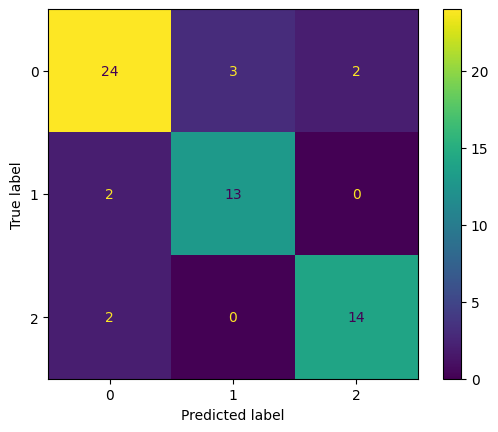

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot()

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.90      0.93      0.92        29
  Overweight       0.87      0.87      0.87        15
 Underweight       1.00      0.94      0.97        16

    accuracy                           0.92        60
   macro avg       0.92      0.91      0.92        60
weighted avg       0.92      0.92      0.92        60



In [ ]:
joblib.dump(model, 'child_growth_model.pkl')
print("Success! Model saved as 'child_growth_model.pkl'")

Success! Model saved as 'child_growth_model.pkl'


In [ ]:
from google.colab import files

content = """streamlit==1.32.0
pandas==2.2.0
numpy==1.26.4
scikit-learn==1.4.1
matplotlib==3.8.3
seaborn==0.13.2
joblib==1.3.2"""

# 2. Write it to a file named 'requirements.txt'
with open('requirements.txt', 'w') as f:
    f.write(content)

# 3. Download it to your computer
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>